# 2.Data Understanding

In [1]:
# initialize
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4').getOrCreate()

In [2]:
# load Data
basicinfo = spark.read.csv('basic_info_data.csv',header=True,inferSchema=True)
bloodinfo = spark.read.csv('blood_test_data.csv',header=True,inferSchema=True)

In [3]:
# visualise the data structure
basicinfo.printSchema()
print('rows:',(basicinfo.count()), 'columns:',(len(basicinfo.columns)))

root
 |-- PATIENT_VISIT_IDENTIFIER: integer (nullable = true)
 |-- AGE_ABOVE65: integer (nullable = true)
 |-- AGE_PERCENTIL: string (nullable = true)
 |-- GENDER: integer (nullable = true)
 |-- DISEASE GROUPING 1: integer (nullable = true)
 |-- DISEASE GROUPING 2: integer (nullable = true)
 |-- DISEASE GROUPING 3: integer (nullable = true)
 |-- DISEASE GROUPING 4: integer (nullable = true)
 |-- DISEASE GROUPING 5: integer (nullable = true)
 |-- DISEASE GROUPING 6: integer (nullable = true)

rows: 1925 columns: 10


In [4]:
# visualise the data structure
bloodinfo.printSchema()
print('rows:',(bloodinfo.count()), 'columns:',(len(bloodinfo.columns)))

root
 |-- PATIENT_VISIT_IDENTIFIER: integer (nullable = true)
 |-- HTN: integer (nullable = true)
 |-- IMMUNOCOMPROMISED: integer (nullable = true)
 |-- OTHER: integer (nullable = true)
 |-- ALBUMIN_MEDIAN: double (nullable = true)
 |-- ALBUMIN_MEAN: double (nullable = true)
 |-- ALBUMIN_MIN: double (nullable = true)
 |-- ALBUMIN_MAX: double (nullable = true)
 |-- ALBUMIN_DIFF: integer (nullable = true)
 |-- BE_ARTERIAL_MEDIAN: double (nullable = true)
 |-- BE_ARTERIAL_MEAN: double (nullable = true)
 |-- BE_ARTERIAL_MIN: double (nullable = true)
 |-- BE_ARTERIAL_MAX: double (nullable = true)
 |-- BE_ARTERIAL_DIFF: integer (nullable = true)
 |-- BE_VENOUS_MEDIAN: double (nullable = true)
 |-- BE_VENOUS_MEAN: double (nullable = true)
 |-- BE_VENOUS_MIN: double (nullable = true)
 |-- BE_VENOUS_MAX: double (nullable = true)
 |-- BE_VENOUS_DIFF: integer (nullable = true)
 |-- BIC_ARTERIAL_MEDIAN: double (nullable = true)
 |-- BIC_ARTERIAL_MEAN: double (nullable = true)
 |-- BIC_ARTERIAL_MIN

rows: 1925 columns: 222


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
PATH1 = os.path.join('basic_info_data.csv')
basic_info = pd.read_csv(PATH1)

In [7]:
basic_info.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# check missing values
basic_info.isnull().sum()/len(basic_info)

PATIENT_VISIT_IDENTIFIER    0.000000
AGE_ABOVE65                 0.000000
AGE_PERCENTIL               0.000000
GENDER                      0.000000
DISEASE GROUPING 1          0.002597
DISEASE GROUPING 2          0.002597
DISEASE GROUPING 3          0.002597
DISEASE GROUPING 4          0.002597
DISEASE GROUPING 5          0.002597
DISEASE GROUPING 6          0.002597
dtype: float64

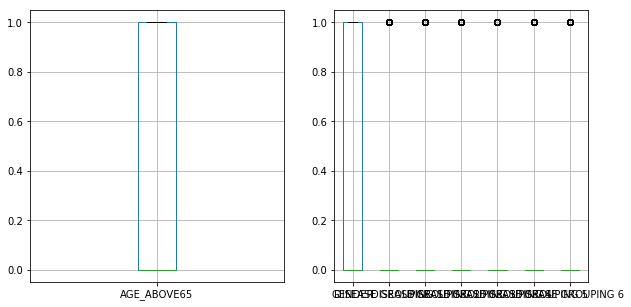

In [9]:
# check extremes and outliers
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
outliers1=basic_info.iloc[:,[1]]
outliers2=basic_info.iloc[:,[3,4,5,6,7,8,9]]
outlier_plot1 = outliers1.boxplot(return_type = 'dict' ,ax=ax[0])
outlier_plot2 = outliers2.boxplot(return_type = 'dict', ax=ax[1])

In [10]:
# load data
PATH1 = os.path.join('blood_test_data.csv')
blood_info = pd.read_csv(PATH1)

In [11]:
blood_info.describe()

,PATIENT_VISIT_IDENTIFIER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# check the missing value of the origin dataset
blood_info.isnull().sum()/len(blood_info)

PATIENT_VISIT_IDENTIFIER            0.000000
HTN                                 0.002597
IMMUNOCOMPROMISED                   0.002597
OTHER                               0.002597
ALBUMIN_MEDIAN                      0.573506
ALBUMIN_MEAN                        0.573506
ALBUMIN_MIN                         0.573506
ALBUMIN_MAX                         0.573506
ALBUMIN_DIFF                        0.573506
BE_ARTERIAL_MEDIAN                  0.573506
BE_ARTERIAL_MEAN                    0.573506
BE_ARTERIAL_MIN                     0.573506
BE_ARTERIAL_MAX                     0.573506
BE_ARTERIAL_DIFF                    0.573506
BE_VENOUS_MEDIAN                    0.573506
BE_VENOUS_MEAN                      0.573506
BE_VENOUS_MIN                       0.573506
BE_VENOUS_MAX                       0.573506
BE_VENOUS_DIFF                      0.573506
BIC_ARTERIAL_MEDIAN                 0.573506
BIC_ARTERIAL_MEAN                   0.573506
BIC_ARTERIAL_MIN                    0.573506
BIC_ARTERI

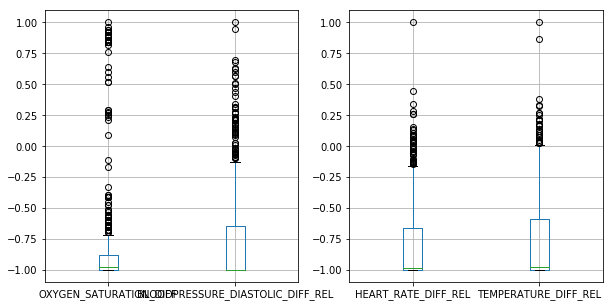

In [13]:
# check the extremes and outliers
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
outliers1=blood_info.loc[:,['OXYGEN_SATURATION_DIFF','BLOODPRESSURE_DIASTOLIC_DIFF_REL']]
outliers2=blood_info.loc[:,['HEART_RATE_DIFF_REL','TEMPERATURE_DIFF_REL']]
outlier_plot1 = outliers1.boxplot(return_type = 'dict',ax=ax[0])
outlier_plot2 = outliers2.boxplot(return_type = 'dict', ax=ax[1])

In [14]:
# merge two datasets into one dataset
data=pd.merge(basic_info,blood_info,"inner")
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [15]:
import seaborn as sns

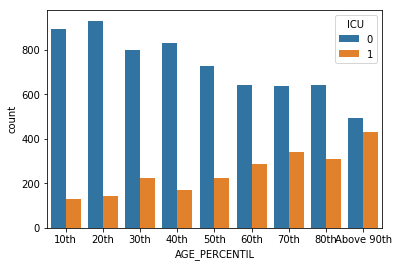

In [16]:
# plot age distribution
sns.countplot(x="AGE_PERCENTIL",hue="ICU", data=data, order=['10th','20th','30th','40th','50th','60th','70th','80th','Above 90th'])

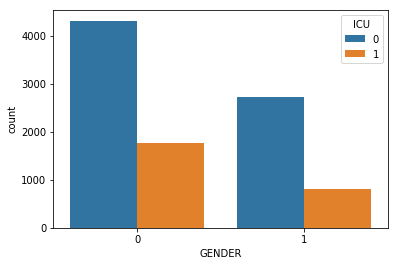

In [17]:
# plot gender distribution
sns.countplot(x="GENDER",hue="ICU", data=data)

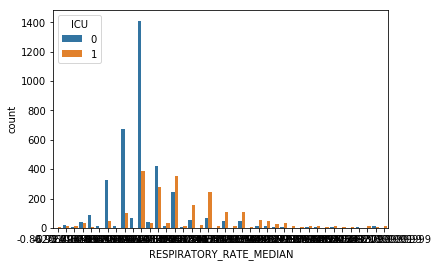

In [18]:
# plot RESPIRATORY_RATE_MEDIAN distribution
sns.countplot(x="RESPIRATORY_RATE_MEDIAN",hue="ICU", data=data)

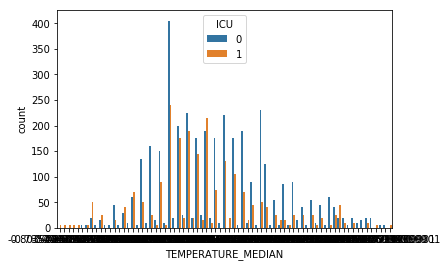

In [19]:
# plot TEMPERATURE_MEDIAN distribution
sns.countplot(x="TEMPERATURE_MEDIAN",hue="ICU", data=data)

# 3. Data preparation

In [20]:
# load other window data
data_02 = os.path.join('0-2.csv')
data_02 = pd.read_csv(data_02)
data_24 = os.path.join('2-4.csv')
data_24 = pd.read_csv(data_24)
data_46 = os.path.join('4-6.csv')
data_46 = pd.read_csv(data_46)
data_612 = os.path.join('6-12.csv')
data_612 = pd.read_csv(data_612)

In [21]:
# check proportion of missing values
print(data_02.isnull().sum()/len(data_02))

PATIENT_VISIT_IDENTIFIER            0.000000
AGE_ABOVE65                         0.000000
AGE_PERCENTIL                       0.000000
GENDER                              0.000000
DISEASE GROUPING 1                  0.002597
DISEASE GROUPING 2                  0.002597
DISEASE GROUPING 3                  0.002597
DISEASE GROUPING 4                  0.002597
DISEASE GROUPING 5                  0.002597
DISEASE GROUPING 6                  0.002597
HTN                                 0.002597
IMMUNOCOMPROMISED                   0.002597
OTHER                               0.002597
ALBUMIN_MEDIAN                      0.553247
ALBUMIN_MEAN                        0.553247
ALBUMIN_MIN                         0.553247
ALBUMIN_MAX                         0.553247
ALBUMIN_DIFF                        0.553247
BE_ARTERIAL_MEDIAN                  0.553247
BE_ARTERIAL_MEAN                    0.553247
BE_ARTERIAL_MIN                     0.553247
BE_ARTERIAL_MAX                     0.553247
BE_ARTERIA

In [22]:
# check proportion of missing values
print(data_24.isnull().sum()/len(data_24))

PATIENT_VISIT_IDENTIFIER            0.000000
AGE_ABOVE65                         0.000000
AGE_PERCENTIL                       0.000000
GENDER                              0.000000
DISEASE GROUPING 1                  0.002597
DISEASE GROUPING 2                  0.002597
DISEASE GROUPING 3                  0.002597
DISEASE GROUPING 4                  0.002597
DISEASE GROUPING 5                  0.002597
DISEASE GROUPING 6                  0.002597
HTN                                 0.002597
IMMUNOCOMPROMISED                   0.002597
OTHER                               0.002597
ALBUMIN_MEDIAN                      0.540260
ALBUMIN_MEAN                        0.540260
ALBUMIN_MIN                         0.540260
ALBUMIN_MAX                         0.540260
ALBUMIN_DIFF                        0.540260
BE_ARTERIAL_MEDIAN                  0.540260
BE_ARTERIAL_MEAN                    0.540260
BE_ARTERIAL_MIN                     0.540260
BE_ARTERIAL_MAX                     0.540260
BE_ARTERIA

In [23]:
# check proportion of missing values
print(data_46.isnull().sum()/len(data_46))

PATIENT_VISIT_IDENTIFIER            0.000000
AGE_ABOVE65                         0.000000
AGE_PERCENTIL                       0.000000
GENDER                              0.000000
DISEASE GROUPING 1                  0.002597
DISEASE GROUPING 2                  0.002597
DISEASE GROUPING 3                  0.002597
DISEASE GROUPING 4                  0.002597
DISEASE GROUPING 5                  0.002597
DISEASE GROUPING 6                  0.002597
HTN                                 0.002597
IMMUNOCOMPROMISED                   0.002597
OTHER                               0.002597
ALBUMIN_MEDIAN                      0.890909
ALBUMIN_MEAN                        0.890909
ALBUMIN_MIN                         0.890909
ALBUMIN_MAX                         0.890909
ALBUMIN_DIFF                        0.890909
BE_ARTERIAL_MEDIAN                  0.890909
BE_ARTERIAL_MEAN                    0.890909
BE_ARTERIAL_MIN                     0.890909
BE_ARTERIAL_MAX                     0.890909
BE_ARTERIA

In [24]:
# check proportion of missing values
print(data_612.isnull().sum()/len(data_612))

PATIENT_VISIT_IDENTIFIER            0.000000
AGE_ABOVE65                         0.000000
AGE_PERCENTIL                       0.000000
GENDER                              0.000000
DISEASE GROUPING 1                  0.002597
DISEASE GROUPING 2                  0.002597
DISEASE GROUPING 3                  0.002597
DISEASE GROUPING 4                  0.002597
DISEASE GROUPING 5                  0.002597
DISEASE GROUPING 6                  0.002597
HTN                                 0.002597
IMMUNOCOMPROMISED                   0.002597
OTHER                               0.002597
ALBUMIN_MEDIAN                      0.854545
ALBUMIN_MEAN                        0.854545
ALBUMIN_MIN                         0.854545
ALBUMIN_MAX                         0.854545
ALBUMIN_DIFF                        0.854545
BE_ARTERIAL_MEDIAN                  0.854545
BE_ARTERIAL_MEAN                    0.854545
BE_ARTERIAL_MIN                     0.854545
BE_ARTERIAL_MAX                     0.854545
BE_ARTERIA

In [25]:
# load data
PATH1 = os.path.join('above12_basicInformation.csv')
basic_info = pd.read_csv(PATH1)
basic_info.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
# load data
PATH2 = os.path.join('above12_bloodTest.csv')
blood_info = pd.read_csv(PATH2)
blood_info.head()

,PATIENT_VISIT_IDENTIFIER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,...,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,1
1,1,0.605263,0.605263,0.605263,0.605263,-1.0,-0.914439,-0.914439,-0.914439,-0.914439,...,0.764706,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,1
2,2,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.705882,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,1
3,3,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.352941,-0.047619,-0.171717,-0.308696,-0.057718,-0.069094,-0.329749,-0.047619,-0.172436,0
4,4,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.823529,-0.642857,-0.939394,-0.652174,-0.596165,-0.634847,-0.817204,-0.645793,-0.940077,0


In [27]:
# merge two datasets into one dataset
data=pd.merge(basic_info,blood_info,"inner")
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,1
1,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.764706,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,1
2,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.705882,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,1
3,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.352941,-0.047619,-0.171717,-0.308696,-0.057718,-0.069094,-0.329749,-0.047619,-0.172436,0
4,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.823529,-0.642857,-0.939394,-0.652174,-0.596165,-0.634847,-0.817204,-0.645793,-0.940077,0


In [28]:
# check proportion of missing values
data.isnull().sum()/len(data)

PATIENT_VISIT_IDENTIFIER            0.000000
AGE_ABOVE65                         0.000000
AGE_PERCENTIL                       0.000000
GENDER                              0.000000
DISEASE GROUPING 1                  0.002597
DISEASE GROUPING 2                  0.002597
DISEASE GROUPING 3                  0.002597
DISEASE GROUPING 4                  0.002597
DISEASE GROUPING 5                  0.002597
DISEASE GROUPING 6                  0.002597
HTN                                 0.002597
IMMUNOCOMPROMISED                   0.002597
OTHER                               0.002597
ALBUMIN_MEDIAN                      0.028571
ALBUMIN_MEAN                        0.028571
ALBUMIN_MIN                         0.028571
ALBUMIN_MAX                         0.028571
ALBUMIN_DIFF                        0.028571
BE_ARTERIAL_MEDIAN                  0.028571
BE_ARTERIAL_MEAN                    0.028571
BE_ARTERIAL_MIN                     0.028571
BE_ARTERIAL_MAX                     0.028571
BE_ARTERIA

In [29]:
data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,385.000000,385.000000,385.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,385.000000
mean,192.000000,0.467532,0.368831,0.143229,0.046875,0.143229,0.023438,0.153646,0.078125,0.299479,...,-0.209099,-0.373202,-0.682381,-0.417827,-0.224556,-0.484161,-0.243964,-0.375202,-0.682284,0.506494
std,111.284171,0.499594,0.483116,0.350763,0.211647,0.350763,0.151486,0.361079,0.268718,0.458627,...,0.553537,0.272407,0.459686,0.341077,0.409773,0.248763,0.493292,0.270612,0.460063,0.500608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.705882,-0.571429,-0.878788,-0.647413,-0.528859,-0.651124,-0.695341,-0.570241,-0.881390,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.294118,-0.404762,-0.838384,-0.513781,-0.313057,-0.546318,-0.308950,-0.403937,-0.838524,1.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.235294,-0.214286,-0.757576,-0.299673,-0.048402,-0.371176,0.149654,-0.214286,-0.759679,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 384
Columns: 230 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(1)
memory usage: 694.8+ KB


In [31]:
# add new features
map_class = {'10th':1, '20th':1, '30th':1, '40th':2, '50th':2, '60th':2, '70th':3, '80th':3, '90th':3}
data['AGE_new_group'] = data['AGE_PERCENTIL'].map(map_class)
data['AGE_new_group']=data['AGE_new_group'].astype('category')

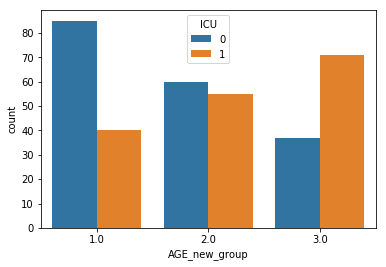

In [32]:
# plot the new feature distribution
sns.countplot(x="AGE_new_group",hue="ICU", data=data)

In [33]:
# change feature format
map_class = {'10th':1, '20th':2, '30th':3, '40th':4, '50th':5, '60th':6, '70th':7, '80th':8, '90th':9}
data['AGE_PERCENTIL'] = data['AGE_PERCENTIL'].map(map_class)

In [34]:
# impute the missing value
data.fillna(method ='ffill', inplace = True)

In [35]:
# check proportion of missing values
data.isnull().sum()/len(data)

PATIENT_VISIT_IDENTIFIER            0.0
AGE_ABOVE65                         0.0
AGE_PERCENTIL                       0.0
GENDER                              0.0
DISEASE GROUPING 1                  0.0
DISEASE GROUPING 2                  0.0
DISEASE GROUPING 3                  0.0
DISEASE GROUPING 4                  0.0
DISEASE GROUPING 5                  0.0
DISEASE GROUPING 6                  0.0
HTN                                 0.0
IMMUNOCOMPROMISED                   0.0
OTHER                               0.0
ALBUMIN_MEDIAN                      0.0
ALBUMIN_MEAN                        0.0
ALBUMIN_MIN                         0.0
ALBUMIN_MAX                         0.0
ALBUMIN_DIFF                        0.0
BE_ARTERIAL_MEDIAN                  0.0
BE_ARTERIAL_MEAN                    0.0
BE_ARTERIAL_MIN                     0.0
BE_ARTERIAL_MAX                     0.0
BE_ARTERIAL_DIFF                    0.0
BE_VENOUS_MEDIAN                    0.0
BE_VENOUS_MEAN                      0.0


In [36]:
# save the final_data
data.to_csv('final_data.csv',index=False)

# 4 Data Transformation

In [37]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import (RandomForestClassifier, GBTClassifier, DecisionTreeClassifier)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [38]:
df = spark.read.csv('final_data.csv',header=True,inferSchema=True)

In [39]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [40]:
np.set_printoptions(threshold=np.inf)

In [41]:
df.columns

['PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'AGE_PERCENTIL',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_

In [42]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=['PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'AGE_PERCENTIL',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_DIFF',
 'CREATININ_MEDIAN',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'CREATININ_DIFF',
 'FFA_MEDIAN',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'FFA_DIFF',
 'GGT_MEDIAN',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GGT_DIFF',
 'GLUCOSE_MEDIAN',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'GLUCOSE_MAX',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_MEDIAN',
 'HEMATOCRITE_MEAN',
 'HEMATOCRITE_MIN',
 'HEMATOCRITE_MAX',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_MEDIAN',
 'HEMOGLOBIN_MEAN',
 'HEMOGLOBIN_MIN',
 'HEMOGLOBIN_MAX',
 'HEMOGLOBIN_DIFF',
 'INR_MEDIAN',
 'INR_MEAN',
 'INR_MIN',
 'INR_MAX',
 'INR_DIFF',
 'LACTATE_MEDIAN',
 'LACTATE_MEAN',
 'LACTATE_MIN',
 'LACTATE_MAX',
 'LACTATE_DIFF',
 'LEUKOCYTES_MEDIAN',
 'LEUKOCYTES_MEAN',
 'LEUKOCYTES_MIN',
 'LEUKOCYTES_MAX',
 'LEUKOCYTES_DIFF',
 'LINFOCITOS_MEDIAN',
 'LINFOCITOS_MEAN',
 'LINFOCITOS_MIN',
 'LINFOCITOS_MAX',
 'LINFOCITOS_DIFF',
 'NEUTROPHILES_MEDIAN',
 'NEUTROPHILES_MEAN',
 'NEUTROPHILES_MIN',
 'NEUTROPHILES_MAX',
 'NEUTROPHILES_DIFF',
 'P02_ARTERIAL_MEDIAN',
 'P02_ARTERIAL_MEAN',
 'P02_ARTERIAL_MIN',
 'P02_ARTERIAL_MAX',
 'P02_ARTERIAL_DIFF',
 'P02_VENOUS_MEDIAN',
 'P02_VENOUS_MEAN',
 'P02_VENOUS_MIN',
 'P02_VENOUS_MAX',
 'P02_VENOUS_DIFF',
 'PC02_ARTERIAL_MEDIAN',
 'PC02_ARTERIAL_MEAN',
 'PC02_ARTERIAL_MIN',
 'PC02_ARTERIAL_MAX',
 'PC02_ARTERIAL_DIFF',
 'PC02_VENOUS_MEDIAN',
 'PC02_VENOUS_MEAN',
 'PC02_VENOUS_MIN',
 'PC02_VENOUS_MAX',
 'PC02_VENOUS_DIFF',
 'PCR_MEDIAN',
 'PCR_MEAN',
 'PCR_MIN',
 'PCR_MAX',
 'PCR_DIFF',
 'PH_ARTERIAL_MEDIAN',
 'PH_ARTERIAL_MEAN',
 'PH_ARTERIAL_MIN',
 'PH_ARTERIAL_MAX',
 'PH_ARTERIAL_DIFF',
 'PH_VENOUS_MEDIAN',
 'PH_VENOUS_MEAN',
 'PH_VENOUS_MIN',
 'PH_VENOUS_MAX',
 'PH_VENOUS_DIFF',
 'PLATELETS_MEDIAN',
 'PLATELETS_MEAN',
 'PLATELETS_MIN',
 'PLATELETS_MAX',
 'PLATELETS_DIFF',
 'POTASSIUM_MEDIAN',
 'POTASSIUM_MEAN',
 'POTASSIUM_MIN',
 'POTASSIUM_MAX',
 'POTASSIUM_DIFF',
 'SAT02_ARTERIAL_MEDIAN',
 'SAT02_ARTERIAL_MEAN',
 'SAT02_ARTERIAL_MIN',
 'SAT02_ARTERIAL_MAX',
 'SAT02_ARTERIAL_DIFF',
 'SAT02_VENOUS_MEDIAN',
 'SAT02_VENOUS_MEAN',
 'SAT02_VENOUS_MIN',
 'SAT02_VENOUS_MAX',
 'SAT02_VENOUS_DIFF',
 'SODIUM_MEDIAN',
 'SODIUM_MEAN',
 'SODIUM_MIN',
 'SODIUM_MAX',
 'SODIUM_DIFF',
 'TGO_MEDIAN',
 'TGO_MEAN',
 'TGO_MIN',
 'TGO_MAX',
 'TGO_DIFF',
 'TGP_MEDIAN',
 'TGP_MEAN',
 'TGP_MIN',
 'TGP_MAX',
 'TGP_DIFF',
 'TTPA_MEDIAN',
 'TTPA_MEAN',
 'TTPA_MIN',
 'TTPA_MAX',
 'TTPA_DIFF',
 'UREA_MEDIAN',
 'UREA_MEAN',
 'UREA_MIN',
 'UREA_MAX',
 'UREA_DIFF',
 'DIMER_MEDIAN',
 'DIMER_MEAN',
 'DIMER_MIN',
 'DIMER_MAX',
 'DIMER_DIFF',
 'BLOODPRESSURE_DIASTOLIC_MEAN',
 'BLOODPRESSURE_SISTOLIC_MEAN',
 'HEART_RATE_MEAN',
 'RESPIRATORY_RATE_MEAN',
 'TEMPERATURE_MEAN',
 'OXYGEN_SATURATION_MEAN',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'HEART_RATE_MEDIAN',
 'RESPIRATORY_RATE_MEDIAN',
 'TEMPERATURE_MEDIAN',
 'OXYGEN_SATURATION_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'BLOODPRESSURE_SISTOLIC_MIN',
 'HEART_RATE_MIN',
 'RESPIRATORY_RATE_MIN',
 'TEMPERATURE_MIN',
 'OXYGEN_SATURATION_MIN',
 'BLOODPRESSURE_DIASTOLIC_MAX',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'HEART_RATE_MAX',
 'RESPIRATORY_RATE_MAX',
 'TEMPERATURE_MAX',
 'OXYGEN_SATURATION_MAX',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'HEART_RATE_DIFF',
 'RESPIRATORY_RATE_DIFF',
 'TEMPERATURE_DIFF',
 'OXYGEN_SATURATION_DIFF',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'HEART_RATE_DIFF_REL',
 'RESPIRATORY_RATE_DIFF_REL',
 'TEMPERATURE_DIFF_REL',
 'OXYGEN_SATURATION_DIFF_REL',
 'AGE_new_group'],outputCol="features")

In [43]:
# transform the data. 
output = assembler.transform(df)

In [44]:
# select the two columns we want. Features (which contains vectors), and the predictor.
final_data = output.select("features",'ICU')

In [45]:
train_data,test_data = final_data.randomSplit([0.7,0.3],seed=0)

In [46]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [47]:
rfc = RandomForestClassifier(labelCol='ICU',featuresCol='features',seed=0)

In [48]:
rfc_model = rfc.fit(train_data)

In [49]:
from pyspark.ml.feature import StringIndexer

In [50]:
rfc_model.featureImportances

SparseVector(230, {0: 0.0018, 11: 0.0003, 13: 0.0015, 14: 0.01, 16: 0.0012, 23: 0.0239, 25: 0.0022, 33: 0.0008, 34: 0.0107, 35: 0.0113, 36: 0.0007, 38: 0.0018, 39: 0.0035, 40: 0.0019, 41: 0.0008, 48: 0.0005, 49: 0.001, 51: 0.0007, 54: 0.0015, 55: 0.0035, 58: 0.0011, 60: 0.003, 61: 0.001, 65: 0.0027, 66: 0.0015, 68: 0.0022, 69: 0.0008, 73: 0.0019, 74: 0.011, 75: 0.0041, 76: 0.0005, 78: 0.0092, 79: 0.0014, 80: 0.0007, 81: 0.0016, 84: 0.0019, 85: 0.0002, 88: 0.025, 89: 0.0025, 90: 0.0024, 91: 0.0187, 93: 0.0005, 95: 0.0008, 96: 0.0009, 98: 0.0038, 100: 0.0006, 103: 0.0043, 104: 0.0108, 105: 0.0029, 106: 0.0123, 113: 0.0059, 114: 0.0009, 115: 0.0013, 116: 0.0108, 119: 0.0009, 123: 0.0049, 124: 0.0013, 125: 0.005, 128: 0.0023, 129: 0.0005, 131: 0.0009, 138: 0.0131, 139: 0.0015, 143: 0.0013, 144: 0.0016, 145: 0.0014, 146: 0.0033, 148: 0.0034, 150: 0.0007, 151: 0.0045, 155: 0.0006, 158: 0.0041, 160: 0.0013, 161: 0.0088, 163: 0.0005, 165: 0.0007, 168: 0.0058, 170: 0.0011, 174: 0.0042, 178: 0.0

In [51]:
# paste the sparse vector as a dictionary
a={0: 0.0018, 11: 0.0003, 13: 0.0015, 14: 0.01, 16: 0.0012, 23: 0.0239, 25: 0.0022, 33: 0.0008, 34: 0.0107, 35: 0.0113, 36: 0.0007, 38: 0.0018, 39: 0.0035, 40: 0.0019, 41: 0.0008, 48: 0.0005, 49: 0.001, 51: 0.0007, 54: 0.0015, 55: 0.0035, 58: 0.0011, 60: 0.003, 61: 0.001, 65: 0.0027, 66: 0.0015, 68: 0.0022, 69: 0.0008, 73: 0.0019, 74: 0.011, 75: 0.0041, 76: 0.0005, 78: 0.0092, 79: 0.0014, 80: 0.0007, 81: 0.0016, 84: 0.0019, 85: 0.0002, 88: 0.025, 89: 0.0025, 90: 0.0024, 91: 0.0187, 93: 0.0005, 95: 0.0008, 96: 0.0009, 98: 0.0038, 100: 0.0006, 103: 0.0043, 104: 0.0108, 105: 0.0029, 106: 0.0123, 113: 0.0059, 114: 0.0009, 115: 0.0013, 116: 0.0108, 119: 0.0009, 123: 0.0049, 124: 0.0013, 125: 0.005, 128: 0.0023, 129: 0.0005, 131: 0.0009, 138: 0.0131, 139: 0.0015, 143: 0.0013, 144: 0.0016, 145: 0.0014, 146: 0.0033, 148: 0.0034, 150: 0.0007, 151: 0.0045, 155: 0.0006, 158: 0.0041, 160: 0.0013, 161: 0.0088, 163: 0.0005, 165: 0.0007, 168: 0.0058, 170: 0.0011, 174: 0.0042, 178: 0.0015, 179: 0.0043, 180: 0.0018, 181: 0.006, 183: 0.0044, 184: 0.0113, 185: 0.0021, 186: 0.0049, 188: 0.0018, 189: 0.0012, 190: 0.0059, 191: 0.0028, 194: 0.0007, 195: 0.0052, 196: 0.0092, 197: 0.0023, 199: 0.0011, 200: 0.0026, 201: 0.0049, 202: 0.0705, 203: 0.0015, 204: 0.0007, 205: 0.0694, 206: 0.0029, 207: 0.0059, 208: 0.0581, 209: 0.0041, 210: 0.0039, 212: 0.0257, 213: 0.0062, 214: 0.0868, 216: 0.0031, 217: 0.0236, 218: 0.0623, 219: 0.0032, 220: 0.0639, 222: 0.0015, 223: 0.0015, 224: 0.0448, 225: 0.0025, 226: 0.0741, 227: 0.0037, 228: 0.0023, 229: 0.0006}

In [52]:
# sort the sequence
sorted(a.items(), key=lambda a:a[1], reverse=True)

[(214, 0.0868),
 (226, 0.0741),
 (202, 0.0705),
 (205, 0.0694),
 (220, 0.0639),
 (218, 0.0623),
 (208, 0.0581),
 (224, 0.0448),
 (212, 0.0257),
 (88, 0.025),
 (23, 0.0239),
 (217, 0.0236),
 (91, 0.0187),
 (138, 0.0131),
 (106, 0.0123),
 (35, 0.0113),
 (184, 0.0113),
 (74, 0.011),
 (104, 0.0108),
 (116, 0.0108),
 (34, 0.0107),
 (14, 0.01),
 (78, 0.0092),
 (196, 0.0092),
 (161, 0.0088),
 (213, 0.0062),
 (181, 0.006),
 (113, 0.0059),
 (190, 0.0059),
 (207, 0.0059),
 (168, 0.0058),
 (195, 0.0052),
 (125, 0.005),
 (123, 0.0049),
 (186, 0.0049),
 (201, 0.0049),
 (151, 0.0045),
 (183, 0.0044),
 (103, 0.0043),
 (179, 0.0043),
 (174, 0.0042),
 (75, 0.0041),
 (158, 0.0041),
 (209, 0.0041),
 (210, 0.0039),
 (98, 0.0038),
 (227, 0.0037),
 (39, 0.0035),
 (55, 0.0035),
 (148, 0.0034),
 (146, 0.0033),
 (219, 0.0032),
 (216, 0.0031),
 (60, 0.003),
 (105, 0.0029),
 (206, 0.0029),
 (191, 0.0028),
 (65, 0.0027),
 (200, 0.0026),
 (89, 0.0025),
 (225, 0.0025),
 (90, 0.0024),
 (128, 0.0023),
 (197, 0.0023),

In [53]:
# choose the top fifteen important features
data.iloc[:,[214,226,202,205,220,218,208,224,212,88,23,217,91,138,106,229]].head()

,RESPIRATORY_RATE_MAX,RESPIRATORY_RATE_DIFF_REL,RESPIRATORY_RATE_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,RESPIRATORY_RATE_MIN,BLOODPRESSURE_SISTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_MAX,LACTATE_MEDIAN,BE_VENOUS_MEDIAN,BLOODPRESSURE_DIASTOLIC_DIFF,LACTATE_MAX,PH_VENOUS_MEDIAN,NEUTROPHILES_MAX,ICU
0,0.272727,0.096774,-0.379310,-0.340206,0.176471,0.325153,-0.857143,0.407558,0.286486,-0.963023,-0.863874,-0.339130,-0.963023,0.393939,-0.868747,1
1,0.757576,0.645161,-0.379310,-0.587629,0.764706,0.472393,-1.000000,0.200359,0.556757,-0.975884,-0.916230,0.513043,-0.975884,0.363636,-0.777911,1
2,-0.454545,-0.695341,-0.517241,-0.298969,-0.705882,-0.435583,-0.642857,-0.343258,-0.351351,-0.948553,-1.000000,-0.547826,-0.948553,0.424242,-0.723890,1
3,-0.272727,-0.329749,-0.517241,-0.381443,-0.352941,-0.190184,-0.857143,-0.057718,-0.286486,-0.828421,-1.000000,-0.078261,-0.828421,0.363636,-0.784714,0
4,-0.454545,-0.817204,-0.517241,0.030928,-0.823529,-0.558282,-0.500000,-0.596165,-0.178378,1.000000,-1.000000,-0.478261,1.000000,0.363636,-0.899960,0


In [54]:
data_final=data.iloc[:,[214,226,202,205,220,218,208,224,212,88,23,217,91,138,106,229]]

In [55]:
# check if the traget class is balance 
y = np.array(data['ICU'])
y.sum()/len(y)

0.5064935064935064

In [56]:
from collections import Counter

In [57]:
y = np.array(data_final['ICU'])
y.sum()/len(y)
print(Counter(y))

Counter({1: 195, 0: 190})


In [58]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [59]:
# make the data balance
smo = SMOTE(sampling_strategy={0: 195},random_state=0)
X_smo, y_smo = smo.fit_resample(data_final.drop(columns=['ICU']), pd.DataFrame(data_final['ICU']))

In [60]:
data_final=X_smo
data_final['ICU']=''
data_final['ICU']=y_smo

In [61]:
y = np.array(data_final['ICU'])
y.sum()/len(y)
print(Counter(y))

Counter({0: 195, 1: 195})


In [62]:
data_final.to_csv('final_data_afterFeatureSelection.csv',index=False)

# 6. Data-mining algorithm(s) selection

In [63]:
df1 = spark.read.csv('final_data_afterFeatureSelection.csv',header=True,inferSchema=True)
df1.columns

['RESPIRATORY_RATE_MAX',
 'RESPIRATORY_RATE_DIFF_REL',
 'RESPIRATORY_RATE_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'RESPIRATORY_RATE_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'RESPIRATORY_RATE_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'LACTATE_MEDIAN',
 'BE_VENOUS_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'LACTATE_MAX',
 'PH_VENOUS_MEDIAN',
 'NEUTROPHILES_MAX',
 'ICU']

In [64]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=[
 'RESPIRATORY_RATE_MAX',
 'RESPIRATORY_RATE_DIFF_REL',
 'RESPIRATORY_RATE_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'RESPIRATORY_RATE_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'RESPIRATORY_RATE_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'LACTATE_MEDIAN',
 'BE_VENOUS_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'LACTATE_MAX',
 'PH_VENOUS_MEDIAN',
 'NEUTROPHILES_MAX'],outputCol="features")

In [65]:
output = assembler.transform(df1)

In [66]:
final_data = output.select("features",'ICU')

In [67]:
seed=0
train_data,test_data = final_data.randomSplit([0.7,0.3],seed=seed)

In [68]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [69]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [70]:
def showCVmodel(model):
    params_metrics = zip(model.getEstimatorParamMaps(), model.avgMetrics)
    results = []
    for params, metric in params_metrics:
        temp = []
        for key, paramValue in zip(params.keys(), params.values()):
            temp.append({key.name:paramValue})
        temp.append(metric)
        results.append(temp)
 
    results_sorted = sorted(results, key=lambda q:q[1], reverse=True)
    print(results_sorted)

In [71]:
# decision tree hyperpara tune
dtc = DecisionTreeClassifier(labelCol='ICU',featuresCol='features')
evaluator  = BinaryClassificationEvaluator(labelCol = 'ICU')
paramGrid = (ParamGridBuilder()
             .addGrid(dtc.maxDepth, [1,2,3,4,5,6,7,8,9,10])
             .build())
cv = CrossValidator(estimator=dtc, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5,seed=seed)
dtc_cvModel = cv.fit(train_data)

In [72]:
showCVmodel(dtc_cvModel)

[[{'maxDepth': 4}, 0.9377399104940334], [{'maxDepth': 3}, 0.9359653769260217], [{'maxDepth': 2}, 0.9265739745226252], [{'maxDepth': 5}, 0.9247563797515072], [{'maxDepth': 7}, 0.9125684975021556], [{'maxDepth': 8}, 0.9125684975021556], [{'maxDepth': 9}, 0.9125684975021556], [{'maxDepth': 10}, 0.9125684975021556], [{'maxDepth': 6}, 0.9122811411803166], [{'maxDepth': 1}, 0.9080841854724913]]


In [73]:
rfc = RandomForestClassifier(labelCol='ICU',featuresCol='features')
evaluator  = BinaryClassificationEvaluator(labelCol = 'ICU')
paramGrid = (ParamGridBuilder()
             .addGrid(rfc.numTrees, [10,50,100,150,200,250,300,400,500])
             .build())
cv = CrossValidator(estimator=rfc, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5,seed=seed)
rfc_cvModel = cv.fit(train_data)


In [74]:
showCVmodel(rfc_cvModel)

[[{'numTrees': 300}, 0.9823535070390392], [{'numTrees': 400}, 0.9814075940414022], [{'numTrees': 150}, 0.9809069515055272], [{'numTrees': 100}, 0.9806545274806144], [{'numTrees': 200}, 0.9805642538067576], [{'numTrees': 500}, 0.9799456728579667], [{'numTrees': 250}, 0.9794240893622452], [{'numTrees': 50}, 0.9778043469709512], [{'numTrees': 10}, 0.9692727965533439]]


In [75]:
gbt = GBTClassifier(labelCol='ICU',featuresCol='features',seed=seed)
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='ICU', rawPredictionCol='prediction')

paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxIter, [5,10,15,20,25])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=my_binary_gbt_eval, numFolds=5,seed=seed)
gbt_cvModel = cv.fit(train_data)

In [76]:
showCVmodel(gbt_cvModel)

[[{'maxIter': 5}, 0.8867221956253065], [{'maxIter': 10}, 0.8867221956253065], [{'maxIter': 15}, 0.88237436953835], [{'maxIter': 20}, 0.88237436953835], [{'maxIter': 25}, 0.88237436953835]]


In [77]:
from pyspark.ml.classification import LogisticRegression

In [78]:
lr = LogisticRegression(featuresCol='features',labelCol='ICU')
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='ICU')

paramGrid = (ParamGridBuilder()
             .addGrid(lr.maxIter, [5,10,20,30,40,50])
             .build())
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=my_eval, numFolds=5,seed=seed)
lr_cvModel = cv.fit(train_data)

In [79]:
showCVmodel(lr_cvModel)

[[{'maxIter': 50}, 0.9357229499062334], [{'maxIter': 40}, 0.9324250091082924], [{'maxIter': 10}, 0.9319036858369691], [{'maxIter': 30}, 0.9284250091082924], [{'maxIter': 20}, 0.922415590598874], [{'maxIter': 5}, 0.9135544794877628]]


# 7. Data mining

In [80]:
dtc = DecisionTreeClassifier(labelCol='ICU',featuresCol='features',maxDepth=4,seed=seed)
rfc = RandomForestClassifier(labelCol='ICU',featuresCol='features',numTrees=500,seed=seed)
gbt = GBTClassifier(labelCol='ICU',featuresCol='features',maxIter=5,seed=seed)
lr = LogisticRegression(featuresCol='features',labelCol='ICU',maxIter=50)
dtc_cvModel=dtc.fit(train_data)
rfc_cvModel=rfc.fit(train_data)
gbt_cvModel=gbt.fit(train_data)
lr_cvModel=lr.fit(train_data)

In [81]:
dtc_predictions = dtc_cvModel.transform(test_data)
rfc_predictions = rfc_cvModel.transform(test_data)
gbt_predictions = gbt_cvModel.transform(test_data)
lr_predictions = lr_cvModel.transform(test_data)

In [82]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="ICU", predictionCol="prediction", metricName="accuracy")
prc=MulticlassClassificationEvaluator(labelCol="ICU", predictionCol="prediction", metricName="weightedPrecision")
recall=MulticlassClassificationEvaluator(labelCol="ICU", predictionCol="prediction", metricName="weightedRecall")
f1=MulticlassClassificationEvaluator(labelCol="ICU", predictionCol="prediction", metricName="f1")

In [83]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)
lr_acc = acc_evaluator.evaluate(lr_predictions)

In [84]:
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))
print('-'*40)
print('A logistic regression has an accuracy of: {0:2.2f}%'.format(lr_acc*100))

----------------------------------------
A single decision tree has an accuracy of: 91.43%
----------------------------------------
A random forest ensemble has an accuracy of: 93.33%
----------------------------------------
An ensemble using GBT has an accuracy of: 91.43%
----------------------------------------
A logistic regression has an accuracy of: 94.29%


In [85]:
dtc_prc = prc.evaluate(dtc_predictions)
rfc_prc = prc.evaluate(rfc_predictions)
gbt_prc = prc.evaluate(gbt_predictions)
lr_prc = prc.evaluate(lr_predictions)

In [86]:
print('-'*40)
print('A single decision tree has a precision of: {0:2.2f}%'.format(dtc_prc*100))
print('-'*40)
print('A random forest ensemble has a precision of: {0:2.2f}%'.format(rfc_prc*100))
print('-'*40)
print('An ensemble using GBT has a precision of: {0:2.2f}%'.format(gbt_prc*100))
print('-'*40)
print('A logistic regression has an precision of: {0:2.2f}%'.format(lr_prc*100))

----------------------------------------
A single decision tree has a precision of: 91.53%
----------------------------------------
A random forest ensemble has a precision of: 93.36%
----------------------------------------
An ensemble using GBT has a precision of: 91.43%
----------------------------------------
A logistic regression has an precision of: 94.29%


In [87]:
dtc_recall = recall.evaluate(dtc_predictions)
rfc_recall = recall.evaluate(rfc_predictions)
gbt_recall = recall.evaluate(gbt_predictions)
lr_recall = recall.evaluate(lr_predictions)

In [88]:
print('-'*40)
print('A single decision tree has a recall of: {0:2.2f}%'.format(dtc_recall*100))
print('-'*40)
print('A random forest ensemble has a recall of: {0:2.2f}%'.format(rfc_recall*100))
print('-'*40)
print('An ensemble using GBT has a recall of: {0:2.2f}%'.format(gbt_recall*100))
print('-'*40)
print('A logistic regression has an recall of: {0:2.2f}%'.format(lr_recall*100))

----------------------------------------
A single decision tree has a recall of: 91.43%
----------------------------------------
A random forest ensemble has a recall of: 93.33%
----------------------------------------
An ensemble using GBT has a recall of: 91.43%
----------------------------------------
A logistic regression has an recall of: 94.29%


In [89]:
dtc_f1 = f1.evaluate(dtc_predictions)
rfc_f1 = f1.evaluate(rfc_predictions)
gbt_f1 = f1.evaluate(gbt_predictions)
lr_f1 = f1.evaluate(lr_predictions)

In [90]:
print('-'*40)
print('A single decision tree has a f1 of: {0:2.2f}%'.format(dtc_f1*100))
print('-'*40)
print('A random forest ensemble has a f1 of: {0:2.2f}%'.format(rfc_f1*100))
print('-'*40)
print('An ensemble using GBT has a f1 of: {0:2.2f}%'.format(gbt_f1*100))
print('-'*40)
print('A logistic regression has an f1 of: {0:2.2f}%'.format(lr_f1*100))

----------------------------------------
A single decision tree has a f1 of: 91.41%
----------------------------------------
A random forest ensemble has a f1 of: 93.34%
----------------------------------------
An ensemble using GBT has a f1 of: 91.42%
----------------------------------------
A logistic regression has an f1 of: 94.29%


### 7.3 search pattern

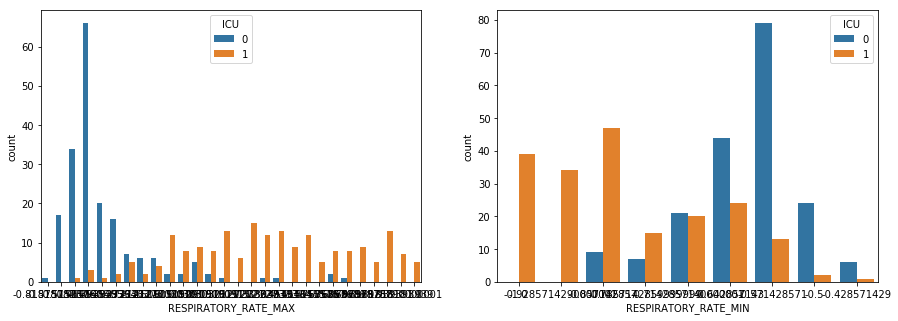

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x="RESPIRATORY_RATE_MAX",hue="ICU", data=data,ax=ax[0])
sns.countplot(x="RESPIRATORY_RATE_MIN",hue="ICU", data=data,ax=ax[1])

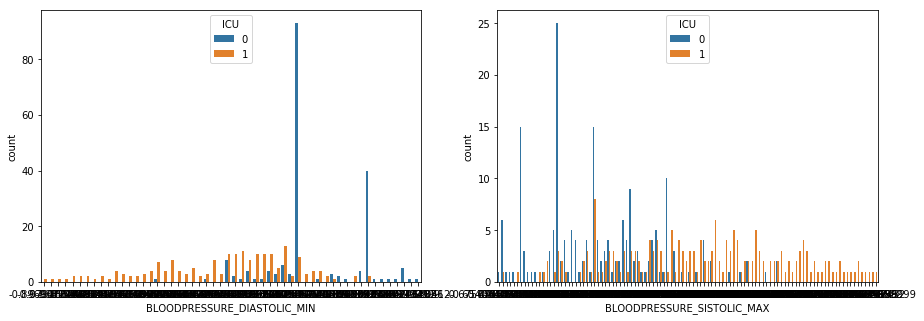

In [92]:
# check BLOODPRESSURE_DIASTOLIC_MIN and BLOODPRESSURE_SISTOLIC_MAX distribution 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x="BLOODPRESSURE_DIASTOLIC_MIN",hue="ICU", data=data,ax=ax[0])
sns.countplot(x="BLOODPRESSURE_SISTOLIC_MAX",hue="ICU", data=data,ax=ax[1])

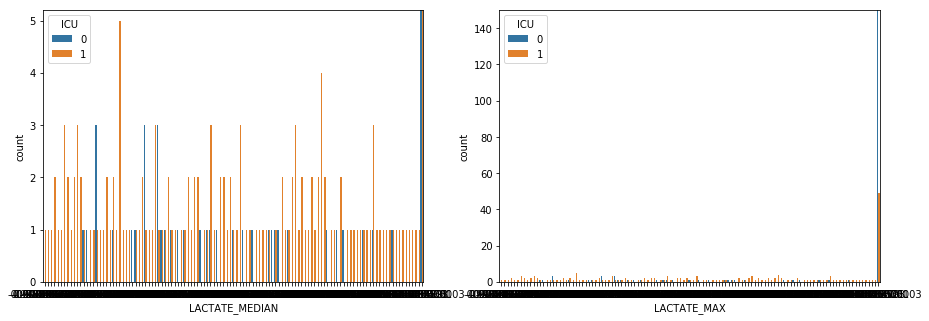

In [93]:
# check LACTATE_MEDIAN and LACTATE_MAX distribution 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
pl1=sns.countplot(x="LACTATE_MEDIAN",hue="ICU", data=data,ax=ax[0])
pl2=sns.countplot(x="LACTATE_MAX",hue="ICU", data=data,ax=ax[1])
pl1.set_ylim(top=5.2)
pl2.set_ylim(top=150)
plt.show()

# 8. Interpretation

In [94]:
from yellowbrick.features import Rank2D

In [95]:
X_smo=X_smo.drop(columns=['ICU'])

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


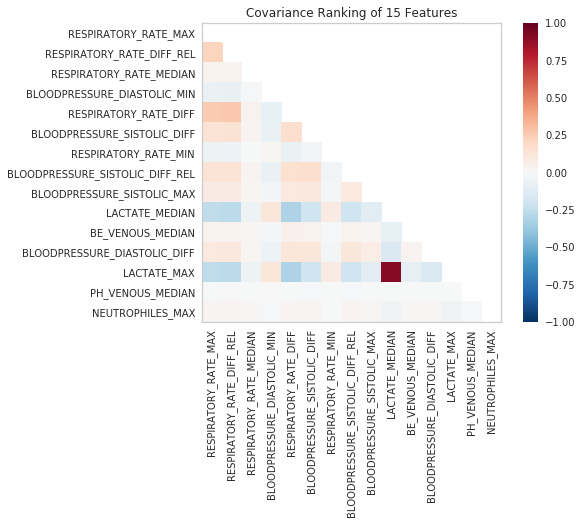

In [96]:
# generate covariance ranking plot
visualizer = Rank2D(features=['RESPIRATORY_RATE_MAX',
 'RESPIRATORY_RATE_DIFF_REL',
 'RESPIRATORY_RATE_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'RESPIRATORY_RATE_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'RESPIRATORY_RATE_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'LACTATE_MEDIAN',
 'BE_VENOUS_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'LACTATE_MAX',
 'PH_VENOUS_MEDIAN',
 'NEUTROPHILES_MAX'], algorithm='covariance')
visualizer.fit(X_smo, y_smo)
visualizer.transform(X_smo) 
visualizer.poof() 

In [97]:
from yellowbrick.features import RadViz

In [98]:
smo = SMOTE(sampling_strategy={0: 195},random_state=0)
X_smo, y_smo = smo.fit_resample(np.array(data_final.drop(columns=['ICU'])), np.array(pd.DataFrame(data_final['ICU'])))

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


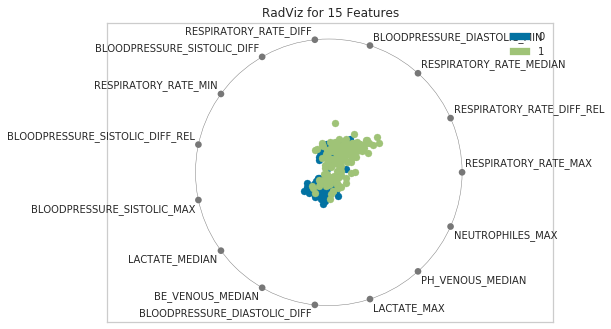

In [99]:
# generate RadViz plot

visualizer = RadViz(classes=[0,1], features=['RESPIRATORY_RATE_MAX',
 'RESPIRATORY_RATE_DIFF_REL',
 'RESPIRATORY_RATE_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'RESPIRATORY_RATE_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'RESPIRATORY_RATE_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'LACTATE_MEDIAN',
 'BE_VENOUS_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'LACTATE_MAX',
 'PH_VENOUS_MEDIAN',
 'NEUTROPHILES_MAX'])

visualizer.fit(X_smo, y_smo)     
visualizer.transform(X_smo)   
visualizer.poof()     

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


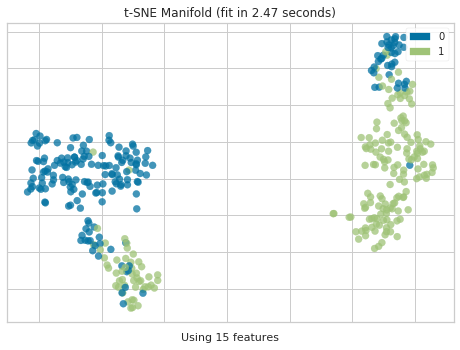

In [100]:
from yellowbrick.features import Manifold

classes = [0, 1]
viz = Manifold(manifold="tsne", classes=classes)
viz.fit_transform(X_smo, y_smo)  
viz.show()              

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


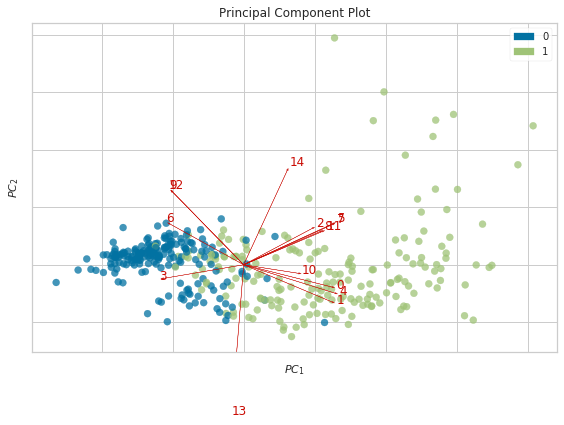

In [101]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X_smo, y_smo)
visualizer.show()

## 8.5 Iterate prior steps (1-7) as required

In [102]:
# load data
data_02 = os.path.join('0-2.csv')
data_02 = pd.read_csv(data_02)

In [103]:
# select 15 features based on feature importance
y_02 = data_02['ICU']
X_02 = data_02.loc[:,['RESPIRATORY_RATE_MAX',
 'RESPIRATORY_RATE_DIFF_REL',
 'RESPIRATORY_RATE_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'RESPIRATORY_RATE_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'RESPIRATORY_RATE_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'LACTATE_MEDIAN',
 'BE_VENOUS_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'LACTATE_MAX',
 'PH_VENOUS_MEDIAN',
 'NEUTROPHILES_MAX']]

In [104]:
from sklearn.impute import SimpleImputer

In [105]:
# Fill with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_02)
X02_filled = imputer.transform(X_02)


In [106]:
print(Counter(y_02))

Counter({0: 353, 1: 32})


In [107]:
smo02 = SMOTE(sampling_strategy={1: 353},random_state=0)
X_smo02, y_smo02 = smo02.fit_resample(X02_filled, y_02)

In [108]:
print(Counter(y_smo02))

Counter({0: 353, 1: 353})


In [109]:
data02_final=pd.DataFrame(columns=['RESPIRATORY_RATE_MAX',
 'RESPIRATORY_RATE_DIFF_REL',
 'RESPIRATORY_RATE_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'RESPIRATORY_RATE_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'RESPIRATORY_RATE_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'LACTATE_MEDIAN',
 'BE_VENOUS_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'LACTATE_MAX',
 'PH_VENOUS_MEDIAN',
 'NEUTROPHILES_MAX','ICU'])

In [110]:
data02_final['RESPIRATORY_RATE_MAX']=X_smo02[0]
data02_final['RESPIRATORY_RATE_DIFF_REL']=X_smo02[1]
data02_final['RESPIRATORY_RATE_MEDIAN']=X_smo02[2]
data02_final['BLOODPRESSURE_DIASTOLIC_MIN']=X_smo02[3]
data02_final['RESPIRATORY_RATE_DIFF']=X_smo02[4]
data02_final['BLOODPRESSURE_SISTOLIC_DIFF']=X_smo02[5]
data02_final['RESPIRATORY_RATE_MIN']=X_smo02[6]
data02_final['BLOODPRESSURE_SISTOLIC_DIFF_REL']=X_smo02[7]
data02_final['BLOODPRESSURE_SISTOLIC_MAX']=X_smo02[8]
data02_final['LACTATE_MEDIAN']=X_smo02[9]
data02_final['BE_VENOUS_MEDIAN']=X_smo02[10]
data02_final['BLOODPRESSURE_DIASTOLIC_DIFF']=X_smo02[11]
data02_final['LACTATE_MAX']=X_smo02[12]
data02_final['PH_VENOUS_MEDIAN']=X_smo02[13]
data02_final['NEUTROPHILES_MAX']=X_smo02[14]
data02_final['ICU']=y_smo02

In [111]:
data02_final.to_csv('final_data_02.csv',index=False)

In [112]:
df2 = spark.read.csv('final_data_02.csv',header=True,inferSchema=True)

In [113]:
output2 = assembler.transform(df2)

In [114]:
final_data2 = output2.select("features",'ICU')

In [115]:
train_data,test_data = final_data2.randomSplit([0.7,0.3],seed=12345)

In [116]:
dtc_cvModel2=dtc.fit(train_data)
rfc_cvModel2=rfc.fit(train_data)
gbt_cvModel2=gbt.fit(train_data)
lr_cvModel2=lr.fit(train_data)

In [117]:
dtc_predictions2 = dtc_cvModel2.transform(test_data)
rfc_predictions2 = rfc_cvModel2.transform(test_data)
gbt_predictions2 = gbt_cvModel2.transform(test_data)
lr_predictions2 = lr_cvModel2.transform(test_data)

In [118]:
dtc_acc2 = acc_evaluator.evaluate(dtc_predictions2)
rfc_acc2 = acc_evaluator.evaluate(rfc_predictions2)
gbt_acc2 = acc_evaluator.evaluate(gbt_predictions2)
lr_acc2 = acc_evaluator.evaluate(lr_predictions2)

In [119]:
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc2*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc2*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc2*100))
print('-'*40)
print('A logistic regression has an accuracy of: {0:2.2f}%'.format(lr_acc2*100))

----------------------------------------
A single decision tree has an accuracy of: 75.00%
----------------------------------------
A random forest ensemble has an accuracy of: 75.00%
----------------------------------------
An ensemble using GBT has an accuracy of: 75.00%
----------------------------------------
A logistic regression has an accuracy of: 75.00%
